# Requirements

In [336]:
# Write your code here. Add as many boxes as you need.
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for Bitcoin. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- symbol - the resource for prediction
- open - the open price of BTC
- high - the high price of BTC
- low - the low price of BTC
- volumeBTC - the volume of trades BTC
- volumeUSD - the volume of trades USD
- close - the close price of BTC

Target:
close

Load the dataset into a `pandas` data frame.

In [416]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('datasets/BTC-Daily.csv')
df

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,2/28/2022 0:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,2/27/2022 0:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,2/26/2022 0:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,2/25/2022 0:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...
2646,12/2/2014 0:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,12/1/2014 0:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,11/30/2014 0:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,11/29/2014 0:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [418]:
df['date'] = pd.to_datetime(df['date'])
df.set_index(keys=['date'], inplace=True)
df.sort_index(inplace=True)

In [7]:
df.head(20)

,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,
2014-11-28,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15
2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19
2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56
2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53
2014-12-03,BTC/USD,379.25,383.00,374.23,376.67,2998357.92,7908.29
2014-12-04,BTC/USD,376.67,378.99,360.01,365.20,3297896.46,8865.09
2014-12-05,BTC/USD,365.20,377.89,363.99,374.95,3331762.49,8951.16
2014-12-06,BTC/USD,374.95,376.99,371.31,375.07,861748.71,2300.21


Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [19]:
df['symbol'].unique()

array(['BTC/USD'], dtype=object)

In [280]:
df.drop(columns='symbol', inplace=True)

In [282]:
df

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2014-11-28,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
...,...,...,...,...,...,...
2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07


<Figure size 1200x600 with 0 Axes>

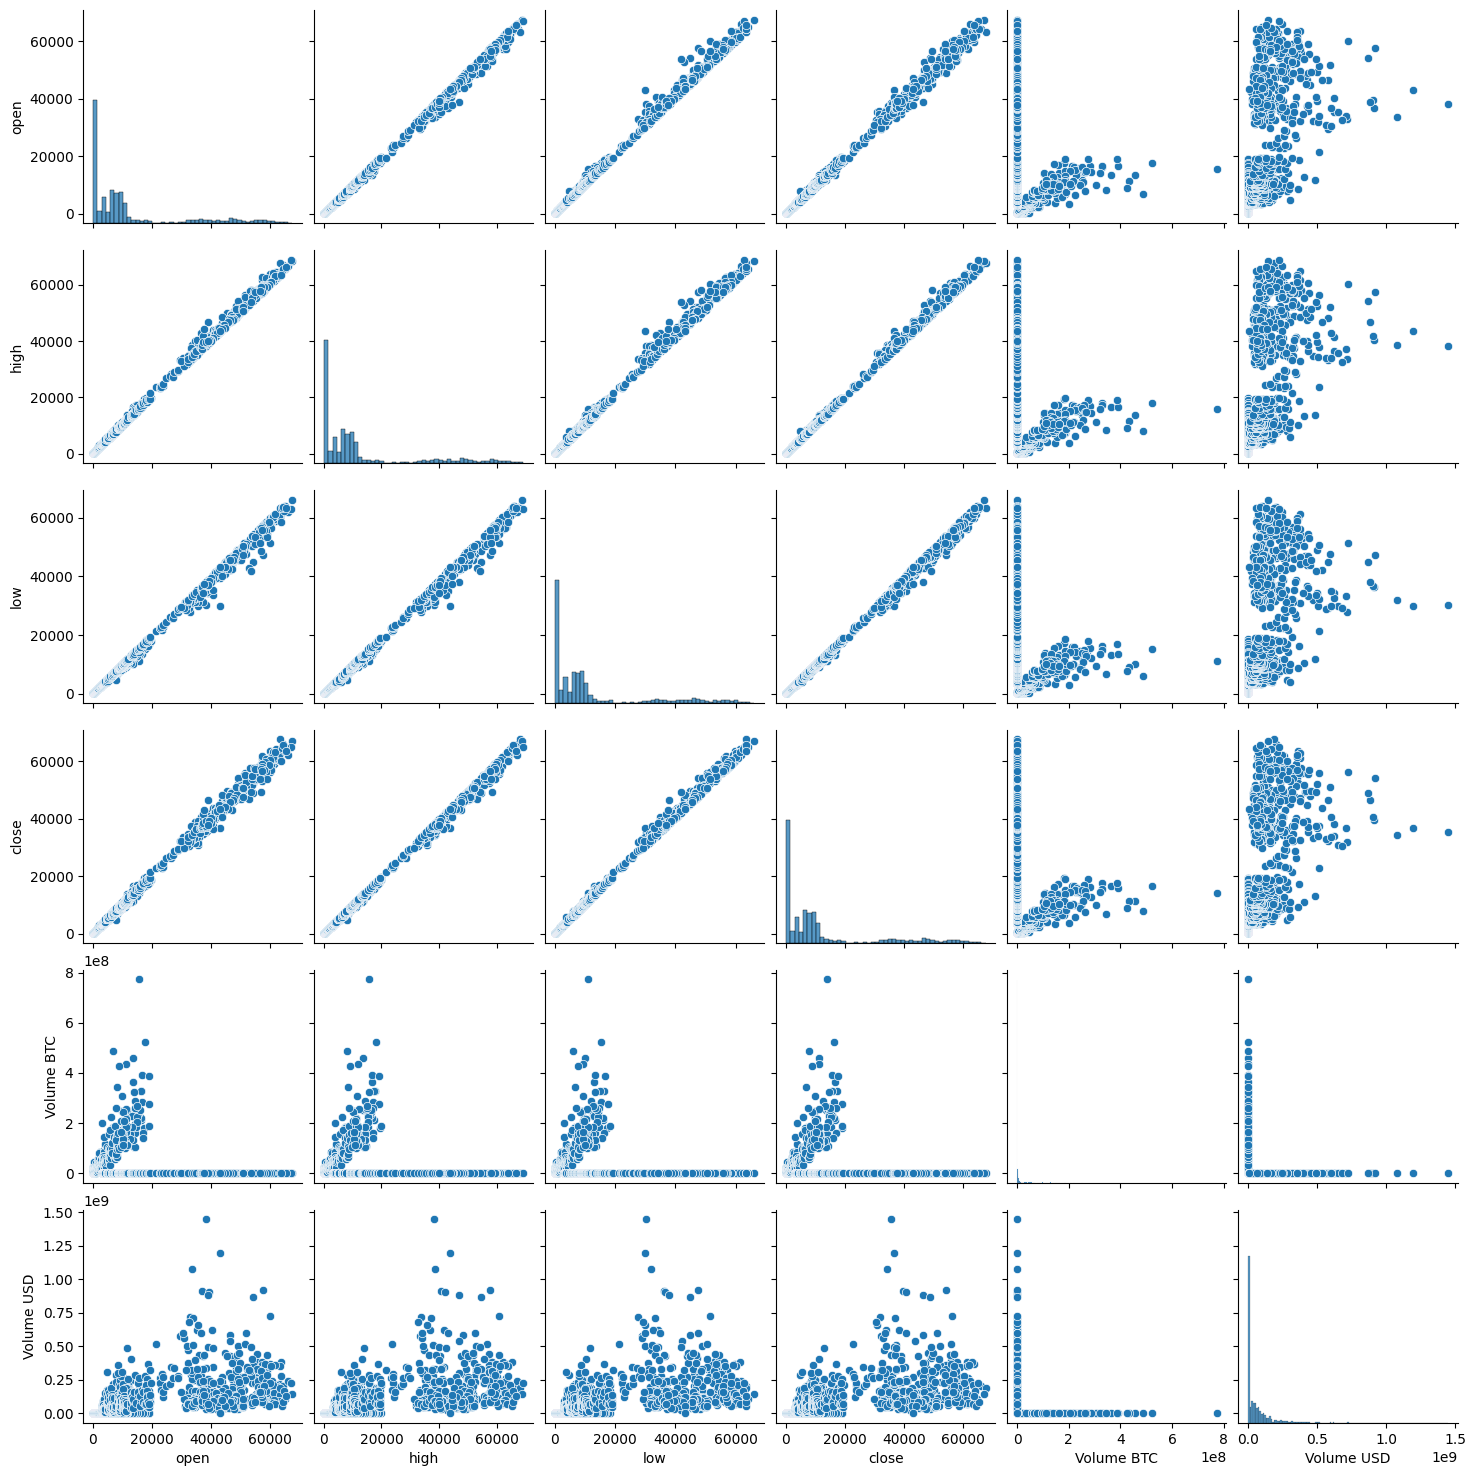

In [13]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show()

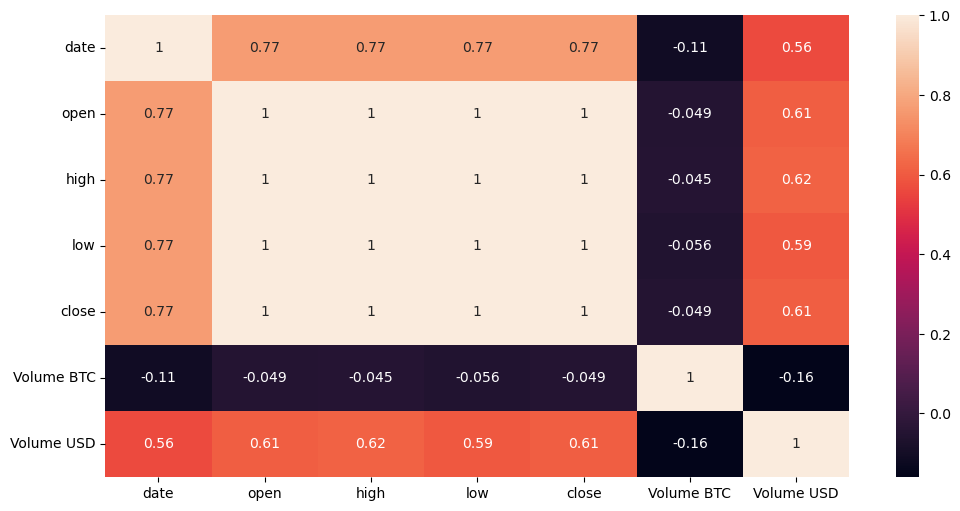

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [284]:
# Write your code here. Add as many boxes as you need.

#1 nacin 
features_without_target = [col for col in df.columns if col not in ['date', 'close']] # BEZ TARGET VARIABLE 
target = 'close'

#target = df['close']

In [286]:
#2 nacin 
features_with_target = [col for col in df.columns if col not in 'date']
target = 'close'

In [288]:
features_with_target

['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']

In [67]:
# for feature in features:
#     df[feature] = df[feature].interpolate(method='linear')

# ako imame null

In [43]:
df.isnull().sum()

symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [290]:
for lag in range (7,0,-1):
    for feature in features_with_target : 
        df[f'{feature}_shift_{lag}'] = df[feature].shift(lag)

In [292]:
df

,open,high,low,close,Volume BTC,Volume USD,open_shift_7,high_shift_7,low_shift_7,close_shift_7,...,low_shift_2,close_shift_2,Volume BTC_shift_2,Volume USD_shift_2,open_shift_1,high_shift_1,low_shift_1,close_shift_1,Volume BTC_shift_1,Volume USD_shift_1
date,,,,,,,,,,,,,,,,,,,,,
2014-11-28,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,NaN,NaN,NaN,NaN,...,360.57,376.28,3.220878e+06,8.617150e+03,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,NaN,NaN,NaN,NaN,...,372.25,376.72,2.746157e+06,7.245190e+03,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,NaN,NaN,NaN,NaN,...,373.32,373.34,1.145567e+06,3.046330e+03,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,40532.66,40996.31,39450.00,39996.99,...,37060.16,37274.18,1.778275e+03,6.628375e+07,37253.26,39720.00,34324.05,38376.88,6.302851e+03,2.418838e+08
2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,40008.75,40471.27,39587.08,40109.02,...,34324.05,38376.88,6.302851e+03,2.418838e+08,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,40108.62,40151.62,37974.18,38373.90,...,38027.61,39231.64,2.202852e+03,8.642149e+07,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07


In [294]:
df.drop(columns=features_without_target, inplace=True) #tuka smeniv - OSTAIV SAMO TARGET KOLONATA

In [296]:
df

,close,open_shift_7,high_shift_7,low_shift_7,close_shift_7,Volume BTC_shift_7,Volume USD_shift_7,open_shift_6,high_shift_6,low_shift_6,...,low_shift_2,close_shift_2,Volume BTC_shift_2,Volume USD_shift_2,open_shift_1,high_shift_1,low_shift_1,close_shift_1,Volume BTC_shift_1,Volume USD_shift_1
date,,,,,,,,,,,,,,,,,,,,,
2014-11-28,376.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-29,376.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03
2014-11-30,373.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360.57,376.28,3.220878e+06,8.617150e+03,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03
2014-12-01,378.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,372.25,376.72,2.746157e+06,7.245190e+03,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2014-12-02,379.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,373.32,373.34,1.145567e+06,3.046330e+03,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-25,39231.64,40532.66,40996.31,39450.00,39996.99,2212.714920,8.850194e+07,40008.75,40471.27,39587.08,...,37060.16,37274.18,1.778275e+03,6.628375e+07,37253.26,39720.00,34324.05,38376.88,6.302851e+03,2.418838e+08
2022-02-26,39146.66,40008.75,40471.27,39587.08,40109.02,695.654296,2.790201e+07,40108.62,40151.62,37974.18,...,34324.05,38376.88,6.302851e+03,2.418838e+08,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
2022-02-27,37712.68,40108.62,40151.62,37974.18,38373.90,1283.511547,4.925334e+07,38384.09,39494.11,36810.72,...,38027.61,39231.64,2.202852e+03,8.642149e+07,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07


In [298]:
df = df.dropna().reset_index(drop=True)

In [274]:
df

,close
0,376.28
1,376.72
2,373.34
3,378.39
4,379.25
...,...
2646,39231.64
2647,39146.66
2648,37712.68
2649,43178.98


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [300]:
x = df.drop(columns='close')
y = df['close']

In [302]:
x

,open_shift_7,high_shift_7,low_shift_7,close_shift_7,Volume BTC_shift_7,Volume USD_shift_7,open_shift_6,high_shift_6,low_shift_6,close_shift_6,...,low_shift_2,close_shift_2,Volume BTC_shift_2,Volume USD_shift_2,open_shift_1,high_shift_1,low_shift_1,close_shift_1,Volume BTC_shift_1,Volume USD_shift_1
0,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03,376.42,386.60,372.25,376.72,...,374.23,376.67,2.998358e+06,7.908290e+03,376.67,378.99,360.01,365.20,3.297896e+06,8.865090e+03
1,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,376.57,381.99,373.32,373.34,...,360.01,365.20,3.297896e+06,8.865090e+03,365.20,377.89,363.99,374.95,3.331762e+06,8.951160e+03
2,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,376.40,382.31,373.03,378.39,...,363.99,374.95,3.331762e+06,8.951160e+03,374.95,376.99,371.31,375.07,8.617487e+05,2.300210e+03
3,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,378.39,382.86,375.23,379.25,...,371.31,375.07,8.617487e+05,2.300210e+03,375.07,377.50,373.16,376.87,9.137156e+05,2.429620e+03
4,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,379.25,383.00,374.23,376.67,...,373.16,376.87,9.137156e+05,2.429620e+03,376.87,377.45,364.60,364.61,3.655238e+06,9.920840e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,40532.66,40996.31,39450.00,39996.99,2.212715e+03,8.850194e+07,40008.75,40471.27,39587.08,40109.02,...,37060.16,37274.18,1.778275e+03,6.628375e+07,37253.26,39720.00,34324.05,38376.88,6.302851e+03,2.418838e+08
2640,40008.75,40471.27,39587.08,40109.02,6.956543e+02,2.790201e+07,40108.62,40151.62,37974.18,38373.90,...,34324.05,38376.88,6.302851e+03,2.418838e+08,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
2641,40108.62,40151.62,37974.18,38373.90,1.283512e+03,4.925334e+07,38384.09,39494.11,36810.72,37076.60,...,38027.61,39231.64,2.202852e+03,8.642149e+07,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2642,38384.09,39494.11,36810.72,37076.60,3.501420e+03,1.298208e+08,37036.98,38463.88,36368.99,38269.94,...,38600.00,39146.66,9.127241e+02,3.573010e+07,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07


In [326]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [328]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [330]:
y_train_scaled = scaler.fit_transform(y_train.to_numpy().reshape(-1,1))

In [332]:
x_train_scaled = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test_scaled = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

## Neural Networks

Create an LSTM model and train it using the `train` function.

In [338]:
# Write your code here. Add as many boxes as you need.

model = Sequential()

model.add(LSTM(128, input_shape =(x_train_scaled.shape[1], x_train_scaled.shape[2]), activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(1, activation='linear'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [340]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [342]:
history = model.fit(x_train_scaled, y_train, batch_size=32, epochs=50, validation_split=0.2, shuffle=False)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 464780918784.0000 - mean_squared_error: 464780918784.0000 - val_loss: 236493275136.0000 - val_mean_squared_error: 236493275136.0000
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 475238203392.0000 - mean_squared_error: 475238203392.0000 - val_loss: 228792270848.0000 - val_mean_squared_error: 228792270848.0000
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 164291887104.0000 - mean_squared_error: 164291887104.0000 - val_loss: 106739056640.0000 - val_mean_squared_error: 106739056640.0000
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 130857377792.0000 - mean_squared_error: 130857377792.0000 - val_loss: 105256689664.0000 - val_mean_squared_error: 105256689664.0000
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 91032494080.0000 - mean_squared_error: 91032494080.0000 - val_loss: 403861405696.0000 - val_mean_squared_error: 403861405696.0000
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/s

Use the trained model to make predictions for the test set.

In [344]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(x_test_scaled)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [354]:
y_pred = y_pred.reshape(-1,1)

y_pred = scaler.inverse_transform(y_pred)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [356]:
# Write your code here. Add as many boxes as you need.
r2_score(y_test, y_pred)

-9.695545889453684e+17

# Additional Bonus Task

Group the data by month. You can use [pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) function.

Create an LSTM model to predict the 'close' price on a montly frequency.

In [420]:
df_monthly = df.groupby(pd.Grouper(freq = 'ME')).sum()

In [426]:
df_monthly

,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,
2014-11-30,BTC/USDBTC/USDBTC/USD,1116.58,1149.93,1106.14,1126.34,7.112602e+06,1.890867e+04
2014-12-31,BTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/...,10654.34,10807.73,10430.08,10596.22,8.959470e+07,2.647025e+05
2015-01-31,BTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/...,7779.24,8079.62,7389.28,7678.82,1.683872e+08,7.301830e+05
2015-02-28,BTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/...,6524.35,6716.07,6354.05,6559.79,5.338739e+07,2.275957e+05
2015-03-31,BTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/...,8338.52,8502.11,8110.14,8326.50,7.613728e+07,2.843678e+05
...,...,...,...,...,...,...,...
2021-11-30,BTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/...,1825425.30,1863195.09,1774296.21,1821164.82,7.220080e+04,4.342089e+09
2021-12-31,BTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/...,1539882.72,1574639.21,1487039.17,1529178.82,7.189638e+04,3.556527e+09
2022-01-31,BTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/USDBTC/...,1281904.34,1307171.49,1240243.49,1274467.34,7.187726e+04,2.865807e+09


In [428]:
df_monthly.drop(columns= 'symbol', inplace=True)

In [430]:
df_monthly

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2014-11-30,1116.58,1149.93,1106.14,1126.34,7.112602e+06,1.890867e+04
2014-12-31,10654.34,10807.73,10430.08,10596.22,8.959470e+07,2.647025e+05
2015-01-31,7779.24,8079.62,7389.28,7678.82,1.683872e+08,7.301830e+05
2015-02-28,6524.35,6716.07,6354.05,6559.79,5.338739e+07,2.275957e+05
2015-03-31,8338.52,8502.11,8110.14,8326.50,7.613728e+07,2.843678e+05
...,...,...,...,...,...,...
2021-11-30,1825425.30,1863195.09,1774296.21,1821164.82,7.220080e+04,4.342089e+09
2021-12-31,1539882.72,1574639.21,1487039.17,1529178.82,7.189638e+04,3.556527e+09
2022-01-31,1281904.34,1307171.49,1240243.49,1274467.34,7.187726e+04,2.865807e+09


In [410]:
features_with_target

['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']

In [432]:
for lag in range(7,0,-1):
    for col in features_with_target:
        df_monthly[f'{col}_lag_{lag}'] = df_monthly[col].shift(lag)

In [434]:
df_monthly

,open,high,low,close,Volume BTC,Volume USD,open_lag_7,high_lag_7,low_lag_7,close_lag_7,...,low_lag_2,close_lag_2,Volume BTC_lag_2,Volume USD_lag_2,open_lag_1,high_lag_1,low_lag_1,close_lag_1,Volume BTC_lag_1,Volume USD_lag_1
date,,,,,,,,,,,,,,,,,,,,,
2014-11-30,1116.58,1149.93,1106.14,1126.34,7.112602e+06,1.890867e+04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,10654.34,10807.73,10430.08,10596.22,8.959470e+07,2.647025e+05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1116.58,1149.93,1106.14,1126.34,7.112602e+06,1.890867e+04
2015-01-31,7779.24,8079.62,7389.28,7678.82,1.683872e+08,7.301830e+05,NaN,NaN,NaN,NaN,...,1106.14,1126.34,7.112602e+06,1.890867e+04,10654.34,10807.73,10430.08,10596.22,8.959470e+07,2.647025e+05
2015-02-28,6524.35,6716.07,6354.05,6559.79,5.338739e+07,2.275957e+05,NaN,NaN,NaN,NaN,...,10430.08,10596.22,8.959470e+07,2.647025e+05,7779.24,8079.62,7389.28,7678.82,1.683872e+08,7.301830e+05
2015-03-31,8338.52,8502.11,8110.14,8326.50,7.613728e+07,2.843678e+05,NaN,NaN,NaN,NaN,...,7389.28,7678.82,1.683872e+08,7.301830e+05,6524.35,6716.07,6354.05,6559.79,5.338739e+07,2.275957e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,1825425.30,1863195.09,1774296.21,1821164.82,7.220080e+04,4.342089e+09,1713886.88,1755352.07,1659762.98,1712955.72,...,1336519.83,1378417.96,6.984236e+04,3.166291e+09,1777960.64,1832507.11,1731892.20,1795432.04,7.918441e+04,4.621066e+09
2021-12-31,1539882.72,1574639.21,1487039.17,1529178.82,7.189638e+04,3.556527e+09,1460673.56,1515097.61,1371790.84,1440152.07,...,1731892.20,1795432.04,7.918441e+04,4.621066e+09,1825425.30,1863195.09,1774296.21,1821164.82,7.220080e+04,4.342089e+09
2022-01-31,1281904.34,1307171.49,1240243.49,1274467.34,7.187726e+04,2.865807e+09,1077703.29,1114477.54,1028742.78,1075303.01,...,1774296.21,1821164.82,7.220080e+04,4.342089e+09,1539882.72,1574639.21,1487039.17,1529178.82,7.189638e+04,3.556527e+09


In [440]:
df_monthly.drop(columns=features_without_target, inplace=True)

In [442]:
df_monthly

,close,open_lag_7,high_lag_7,low_lag_7,close_lag_7,Volume BTC_lag_7,Volume USD_lag_7,open_lag_6,high_lag_6,low_lag_6,...,low_lag_2,close_lag_2,Volume BTC_lag_2,Volume USD_lag_2,open_lag_1,high_lag_1,low_lag_1,close_lag_1,Volume BTC_lag_1,Volume USD_lag_1
date,,,,,,,,,,,,,,,,,,,,,
2014-11-30,1126.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,10596.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1116.58,1149.93,1106.14,1126.34,7.112602e+06,1.890867e+04
2015-01-31,7678.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1106.14,1126.34,7.112602e+06,1.890867e+04,10654.34,10807.73,10430.08,10596.22,8.959470e+07,2.647025e+05
2015-02-28,6559.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10430.08,10596.22,8.959470e+07,2.647025e+05,7779.24,8079.62,7389.28,7678.82,1.683872e+08,7.301830e+05
2015-03-31,8326.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7389.28,7678.82,1.683872e+08,7.301830e+05,6524.35,6716.07,6354.05,6559.79,5.338739e+07,2.275957e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,1821164.82,1713886.88,1755352.07,1659762.98,1712955.72,139623.602276,7.891078e+09,1460673.56,1515097.61,1371790.84,...,1336519.83,1378417.96,6.984236e+04,3.166291e+09,1777960.64,1832507.11,1731892.20,1795432.04,7.918441e+04,4.621066e+09
2021-12-31,1529178.82,1460673.56,1515097.61,1371790.84,1440152.07,209751.849386,9.144881e+09,1077703.29,1114477.54,1028742.78,...,1731892.20,1795432.04,7.918441e+04,4.621066e+09,1825425.30,1863195.09,1774296.21,1821164.82,7.220080e+04,4.342089e+09
2022-01-31,1274467.34,1077703.29,1114477.54,1028742.78,1075303.01,144223.400194,5.132103e+09,1061369.75,1091870.32,1034406.24,...,1774296.21,1821164.82,7.220080e+04,4.342089e+09,1539882.72,1574639.21,1487039.17,1529178.82,7.189638e+04,3.556527e+09


In [446]:
df_monthly = df_monthly.dropna().reset_index(drop=True)

In [448]:
df_monthly

,close,open_lag_7,high_lag_7,low_lag_7,close_lag_7,Volume BTC_lag_7,Volume USD_lag_7,open_lag_6,high_lag_6,low_lag_6,...,low_lag_2,close_lag_2,Volume BTC_lag_2,Volume USD_lag_2,open_lag_1,high_lag_1,low_lag_1,close_lag_1,Volume BTC_lag_1,Volume USD_lag_1
0,7121.66,1116.58,1149.93,1106.14,1126.34,7.112602e+06,1.890867e+04,10654.34,10807.73,10430.08,...,6909.87,7045.00,5.872634e+07,2.525098e+05,7328.49,7414.13,7237.34,7320.76,4.348303e+07,1.839240e+05
1,8667.46,10654.34,10807.73,10430.08,10596.22,8.959470e+07,2.647025e+05,7779.24,8079.62,7389.28,...,7237.34,7320.76,4.348303e+07,1.839240e+05,7086.61,7196.09,7007.59,7121.66,5.562740e+07,2.319177e+05
2,7809.93,7779.24,8079.62,7389.28,7678.82,1.683872e+08,7.301830e+05,6524.35,6716.07,6354.05,...,7007.59,7121.66,5.562740e+07,2.319177e+05,8648.24,8821.30,8511.64,8667.46,1.095482e+08,3.907001e+05
3,7000.39,6524.35,6716.07,6354.05,6559.79,5.338739e+07,2.275957e+05,8338.52,8502.11,8110.14,...,8511.64,8667.46,1.095482e+08,3.907001e+05,7864.48,7969.46,7678.10,7809.93,9.605207e+07,4.006419e+05
4,8222.26,8338.52,8502.11,8110.14,8326.50,7.613728e+07,2.843678e+05,7053.23,7170.69,6909.87,...,7678.10,7809.93,9.605207e+07,4.006419e+05,6995.62,7081.62,6911.38,7000.39,1.302740e+08,5.573467e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1821164.82,1713886.88,1755352.07,1659762.98,1712955.72,1.396236e+05,7.891078e+09,1460673.56,1515097.61,1371790.84,...,1336519.83,1378417.96,6.984236e+04,3.166291e+09,1777960.64,1832507.11,1731892.20,1795432.04,7.918441e+04,4.621066e+09
78,1529178.82,1460673.56,1515097.61,1371790.84,1440152.07,2.097518e+05,9.144881e+09,1077703.29,1114477.54,1028742.78,...,1731892.20,1795432.04,7.918441e+04,4.621066e+09,1825425.30,1863195.09,1774296.21,1821164.82,7.220080e+04,4.342089e+09
79,1274467.34,1077703.29,1114477.54,1028742.78,1075303.01,1.442234e+05,5.132103e+09,1061369.75,1091870.32,1034406.24,...,1774296.21,1821164.82,7.220080e+04,4.342089e+09,1539882.72,1574639.21,1487039.17,1529178.82,7.189638e+04,3.556527e+09
80,1141369.10,1061369.75,1091870.32,1034406.24,1067920.03,7.996805e+04,2.799097e+09,1410923.89,1449302.62,1375548.17,...,1487039.17,1529178.82,7.189638e+04,3.556527e+09,1281904.34,1307171.49,1240243.49,1274467.34,7.187726e+04,2.865807e+09


In [454]:
x_new = df_monthly.drop(columns=['close'])
y_new = df_monthly['close']

In [458]:
x_new

,open_lag_7,high_lag_7,low_lag_7,close_lag_7,Volume BTC_lag_7,Volume USD_lag_7,open_lag_6,high_lag_6,low_lag_6,close_lag_6,...,low_lag_2,close_lag_2,Volume BTC_lag_2,Volume USD_lag_2,open_lag_1,high_lag_1,low_lag_1,close_lag_1,Volume BTC_lag_1,Volume USD_lag_1
0,1116.58,1149.93,1106.14,1126.34,7.112602e+06,1.890867e+04,10654.34,10807.73,10430.08,10596.22,...,6909.87,7045.00,5.872634e+07,2.525098e+05,7328.49,7414.13,7237.34,7320.76,4.348303e+07,1.839240e+05
1,10654.34,10807.73,10430.08,10596.22,8.959470e+07,2.647025e+05,7779.24,8079.62,7389.28,7678.82,...,7237.34,7320.76,4.348303e+07,1.839240e+05,7086.61,7196.09,7007.59,7121.66,5.562740e+07,2.319177e+05
2,7779.24,8079.62,7389.28,7678.82,1.683872e+08,7.301830e+05,6524.35,6716.07,6354.05,6559.79,...,7007.59,7121.66,5.562740e+07,2.319177e+05,8648.24,8821.30,8511.64,8667.46,1.095482e+08,3.907001e+05
3,6524.35,6716.07,6354.05,6559.79,5.338739e+07,2.275957e+05,8338.52,8502.11,8110.14,8326.50,...,8511.64,8667.46,1.095482e+08,3.907001e+05,7864.48,7969.46,7678.10,7809.93,9.605207e+07,4.006419e+05
4,8338.52,8502.11,8110.14,8326.50,7.613728e+07,2.843678e+05,7053.23,7170.69,6909.87,7045.00,...,7678.10,7809.93,9.605207e+07,4.006419e+05,6995.62,7081.62,6911.38,7000.39,1.302740e+08,5.573467e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1713886.88,1755352.07,1659762.98,1712955.72,1.396236e+05,7.891078e+09,1460673.56,1515097.61,1371790.84,1440152.07,...,1336519.83,1378417.96,6.984236e+04,3.166291e+09,1777960.64,1832507.11,1731892.20,1795432.04,7.918441e+04,4.621066e+09
78,1460673.56,1515097.61,1371790.84,1440152.07,2.097518e+05,9.144881e+09,1077703.29,1114477.54,1028742.78,1075303.01,...,1731892.20,1795432.04,7.918441e+04,4.621066e+09,1825425.30,1863195.09,1774296.21,1821164.82,7.220080e+04,4.342089e+09
79,1077703.29,1114477.54,1028742.78,1075303.01,1.442234e+05,5.132103e+09,1061369.75,1091870.32,1034406.24,1067920.03,...,1774296.21,1821164.82,7.220080e+04,4.342089e+09,1539882.72,1574639.21,1487039.17,1529178.82,7.189638e+04,3.556527e+09
80,1061369.75,1091870.32,1034406.24,1067920.03,7.996805e+04,2.799097e+09,1410923.89,1449302.62,1375548.17,1416858.19,...,1487039.17,1529178.82,7.189638e+04,3.556527e+09,1281904.34,1307171.49,1240243.49,1274467.34,7.187726e+04,2.865807e+09


In [526]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, shuffle=False)

In [528]:
scaler_new = MinMaxScaler()

x_train = scaler_new.fit_transform(x_train)
x_test = scaler_new.transform(x_test)

In [530]:
scaler_new = MinMaxScaler()

y_train = scaler_new.fit_transform(y_train.to_numpy().reshape(-1,1))

In [532]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_yest = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [496]:
x_train.shape

(65, 42, 1)

In [534]:
model2 = Sequential()

model2.add(LSTM(64, input_shape = (x_train.shape[1], x_train.shape[2]), activation = 'relu', return_sequences=True))
model2.add(LSTM(32, activation='relu'))
model2.add(Dense(1, activation = 'linear'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [536]:
model2.compile(loss='mean_squared_error', optimizer = 'adam', metrics = ['mean_squared_error'])

In [538]:
history = model2.fit(x_train, y_train, batch_size=64, epochs = 16, validation_split=0.2, shuffle=False)

Epoch 1/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step - loss: 0.1411 - mean_squared_error: 0.1411 - val_loss: 0.3740 - val_mean_squared_error: 0.3740
Epoch 2/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1361 - mean_squared_error: 0.1361 - val_loss: 0.3610 - val_mean_squared_error: 0.3610
Epoch 3/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1312 - mean_squared_error: 0.1312 - val_loss: 0.3487 - val_mean_squared_error: 0.3487
Epoch 4/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1267 - mean_squared_error: 0.1267 - val_loss: 0.3383 - val_mean_squared_error: 0.3383
Epoch 5/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1226 - mean_squared_error: 0.1226 - val_loss: 0.3271 - val_mean_squared_error: 0.3271
Epoch 6/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1183 - mean_squared_error: 0.1183 - val_loss: 0.3147 - val_mean_squared_error: 0.3147
Epoch 7/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.3014 - val_mean_square

<Axes: >

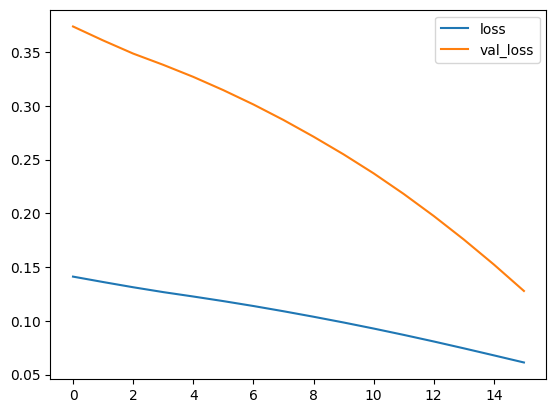

In [542]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [544]:
y_pred = model2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [546]:
y_pred = scaler_new.inverse_transform(y_pred)

In [548]:
r2_score(y_test, y_pred)

-1.636869103805625